## Problem Statement -
In today’s world OTT platform and Streaming
Services have taken up a big chunk in the
Retail and Entertainment industry.
Organizations like Netflix, Amazon etc.
analyse User Activity Pattern’s and suggest
products that better suit the user needs and
choices.
 For the purpose of this Project we will be
creating one such Recommendation Engine
from the ground-up, where every single user,
based on there area of interest and ratings,
would be recommended a list of movies that
are best suited for them

### About the dataset after the data cleaning

1. ID – Contains the separate keys for
customer and movies.
2. Rating – A section contains the user
ratings for all the movies.
3. Genre – Highlights the category of the
movie.
4. Movie Name – Name of the movie with
respect to the movie id.


Around100M+ ratings 4499 movies 480,000+ users

Objectives -
1. Find out the list of most popular and liked genre
2. Create Model that finds the best suited Movie for one
user in every genre.
3. Find what Genre Movies have received the best and
worst ratings based on User Rating

### Steps -
1)Data Preprocessing
2) Exploratory Data Analysis (EDA)
Model Selection
Model Training
Model Evaluation

My initial step involves data preprocessing, specifically the cleaning of two raw datasets. Aim to enhance its quality and prepare it for subsequent stages of analysis and model development. This foundational step is crucial for maximizing the accuracy and effectiveness of our predictive models

In [ ]:
## Importing the requied libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
netflix_data = pd.read_csv('/content/drive/MyDrive/netflix datasets/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [ ]:
netflix_data

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
netflix_data.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [ ]:
# numbers of null rows in rating are the number of movie
null_rating_rows = netflix_data[netflix_data['Rating'].isnull()]
null_rating_rows

,Cust_Id,Rating
0,1:,NaN
548,2:,NaN
694,3:,NaN
2707,4:,NaN
2850,5:,NaN
...,...,...
24046714,4495:,NaN
24047329,4496:,NaN
24056849,4497:,NaN
24057564,4498:,NaN


In [ ]:
netflix_data.duplicated().sum()

22234208

In [ ]:
netflix_data.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [ ]:
movie_count=netflix_data.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:

movie_count=movie_count["Rating"]

In [ ]:
movie_count


4499

In [ ]:
## How many customer in dataset
customer_count=netflix_data['Cust_Id'].nunique()

In [ ]:
customer_count

475257

In [ ]:

customer_count=customer_count-movie_count
customer_count

470758

In [ ]:
rating_count=netflix_data['Cust_Id'].count()-movie_count
rating_count

24053764

In [ ]:
rating_cust = netflix_data.groupby('Rating')['Cust_Id'].agg(['count'])
rating_cust

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [ ]:
# To know number of people have rated the movies as 1,2,3,4,5 stars ratings to the movies
rating = netflix_data.groupby('Rating')['Rating'].agg(['count'])

In [ ]:
rating


,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


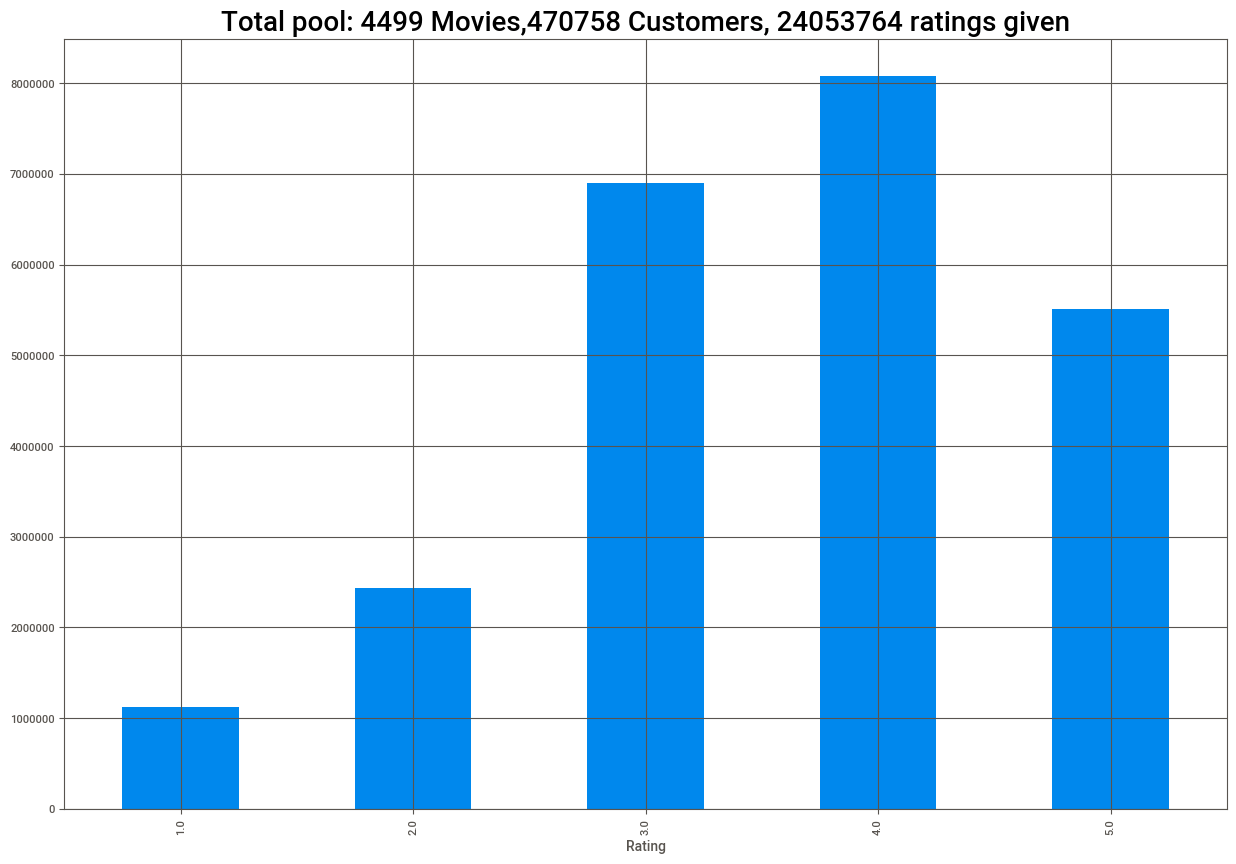

In [ ]:
ax= rating.plot(kind = 'bar',legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies,{customer_count} Customers, {rating_count} ratings given', fontsize = 20)
plt.grid(True)

#### Highest rating is 4.0

In [ ]:
# For Movie data
df_nan=pd.DataFrame(pd.isnull(netflix_data.Rating))

In [ ]:
df_nan.sum()

Rating    4499
dtype: int64

In [ ]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
df_nan.shape

(4499, 2)

In [ ]:
df_nan = df_nan.reset_index()

In [ ]:
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1

#account for last record and corresponding length
#numpy approach
last_record=np.full((1, len(netflix_data)-df_nan.iloc[-1,0]-1), movie_id)#movie id will be 4499
movie_np=np.append(movie_np, last_record)

In [ ]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [ ]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [ ]:
len(movie_np)

48107100

In [ ]:
len(netflix_data)

24058263

In [ ]:
df_nan.shape

(4499, 3)

In [ ]:
df_nan.iloc[-1,0]

24057834

In [ ]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [ ]:
netflix_data=netflix_data[pd.notnull(netflix_data['Rating'])]

netflix_data['Movie_Id']=movie_np.astype(int)
netflix_data['Cust_Id']=netflix_data['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_data

<ipython-input-67-a23dd7a0a9c8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now the dataset will look like: 


<ipython-input-67-a23dd7a0a9c8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
dataset_movie_summary=netflix_data.groupby('Movie_Id')['Rating'].agg(["count"])

In [ ]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
dataset_movie_summary["count"].quantile(0.7) #  considere top 70 % movie

1798.6

In [ ]:
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [ ]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [ ]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)

In [ ]:
len(drop_movie_list)

3149

In [ ]:
dataset_cust_summary=netflix_data.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [ ]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=327300)

In [ ]:
len(drop_cust_list)

327300

In [ ]:
print('The original dataframe has: ', netflix_data.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [ ]:
netflix_data['Movie_Id'].isin(drop_movie_list)

1           True
2           True
3           True
4           True
5           True
            ... 
24058258    True
24058259    True
24058260    True
24058261    True
24058262    True
Name: Movie_Id, Length: 24053764, dtype: bool

In [ ]:
netflix_data=netflix_data[~netflix_data['Movie_Id'].isin(drop_movie_list)]
netflix_data=netflix_data[~netflix_data['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_data.shape))

After the triming, the shape is: (17337458, 3)


In [ ]:
netflix_data.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
import pandas as pd

In [ ]:
data_title = pd.read_csv("/content/drive/MyDrive/netflix datasets/movie_titles (1).csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])
data_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
data_title.set_index('Movie_Id', inplace=True)

In [ ]:
data_title.iloc[:4499,:]

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,1993.0,Farewell My Concubine
4497,1990.0,Texasville


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163008 sha256=7d2a43303ffffd15ff21b2e762eaef23aee60a869bd4b5073fc43a7f59a5966a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
#model building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader=Reader()

In [ ]:
data=Dataset.load_from_df(netflix_data[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [ ]:

model=SVD()

In [ ]:
cross_validate(model, data, measures=['RMSE','MAE'], cv=4)

{'test_rmse': array([1.00499775, 0.99691443, 0.99169495, 0.99340908]),
 'test_mae': array([0.80432518, 0.79254758, 0.78881481, 0.79864824]),
 'fit_time': (1.698430061340332,
  1.85748291015625,
  5.307783126831055,
  3.7005083560943604),
 'test_time': (0.12868833541870117,
  0.25190091133117676,
  0.4435310363769531,
  0.37714672088623047)}

In [ ]:
dataset_1331154=netflix_data[(netflix_data['Cust_Id'] ==1331154)& (netflix_data['Rating']==5)]

dataset_1331154

,Cust_Id,Rating,Movie_Id
458308,1331154,5.0,143
1184450,1331154,5.0,270
1991774,1331154,5.0,361
2369367,1331154,5.0,457
2600328,1331154,5.0,482
3417458,1331154,5.0,658
4029215,1331154,5.0,763
5646194,1331154,5.0,1144
7075510,1331154,5.0,1425
7423467,1331154,5.0,1476


In [ ]:
data_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
user=data_title.copy()
user

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch
